In [1]:
import sklearn
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df=pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
X = df.drop('class', axis=1)
y = df.iloc[:, -1]


In [6]:
y.value_counts()


0    762
1    610
Name: class, dtype: int64

Text(0, 0.5, 'Frequency')

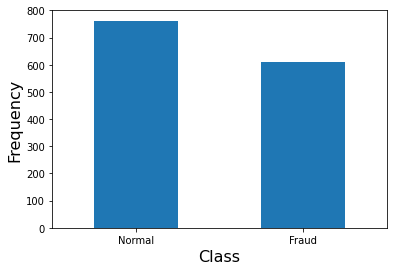

In [7]:
y.value_counts().plot(kind='bar', rot=0)
plt.xticks(range(2), labels=['Normal', 'Fraud'])
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
X_train.shape, y_test.shape


((1097, 4), (275,))

In [10]:
from sklearn.linear_model import LogisticRegression


In [11]:
classifier = LogisticRegression()


In [12]:
classifier.fit(X_train, y_train)


LogisticRegression()

In [13]:
y_pred = classifier.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [16]:
accuracy_score(y_test,y_pred)

0.9854545454545455

In [17]:
confusion_matrix(y_test, y_pred)


array([[146,   2],
       [  2, 125]])

In [19]:
import pickle


In [20]:
with open('classifier.pkl', 'wb') as f:
  pickle.dump(classifier, f)


In [21]:
with open('classifier.pkl', 'rb') as f:
  pickle.load(f)


In [24]:
classifier.predict([[1,2,3,4]])

array([0])